# Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Checking Data

In [2]:
df = pd.read_csv("movie.csv")
df.head() # viewing only the head of the dataset

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


In [3]:
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


In [4]:
print(df['Genre'].unique(),"\n")
print(df['Rotten Tomatoes'].unique(),"\n")
print(df['IMDB'].unique(),"\n")
print(df['Audience Ratings'].unique(),"\n")
print(df['Budget_M'].unique(),"\n")
print(df['Sales Revenue_M'].unique(),"\n")
print(df['Year of Release'].unique(),"\n")

['Horror' 'Romance' 'SciFi' 'Action' 'Thriller' 'Comedy' 'Sci-Fi' 'Drama'
 'Documentary'] 

[125  84  75  68   6  47   3  76 100  52  78 118  20  99  58  23  79  13
  85  48  49  69  41  35  64  95 142  94   0  50  36  34  93  98  42  77
  21  73  10  43  59   2  62  67  82  46  81  27  14  65  86  11 138  80
  32  54  38  19  56  60  30  24  40  72  26 116  61] 

[5.  9.8 2.  7.9 4.7 7.1 3.2 3.8 9.7 6.3 6.9 5.8 3.1 4.6 6.6 5.3 5.2 7.4
 3.6 4.5 7.7 8.9 1.9 1.8 4.2 6.  1.3 3.9 3.  2.3 9.9 3.3 8.6 9.1 5.6 2.5
 8.  8.8 4.4 4.8 1.5 4.3 1.1 9.5 4.1 5.4 2.6 6.5 6.4 8.1 5.5 7.3 3.4 7.8
 2.9 6.1 5.1 5.9 8.7] 

[3968 8150 1040 6250 8356 8798 7704 6772 5311 9411 9523 9144 6011 2798
 8352 2195 4680 6599 9303 3085 5713 5240  732 5028 8473 7594 4566 9500
 7444 3396 5347 7034  595  647  573 6797 5637 8448 5259 9220 6567 4444
 2989  586 5102 7601  739 4882 5410  437 3898 1847 9724 1020 6930  941
 8641 5610 9008 2107 9882 4259  945 8393 7468 1805 1862 8742 3751 9864
 2040  903 8696 8015 5896 7942 7377

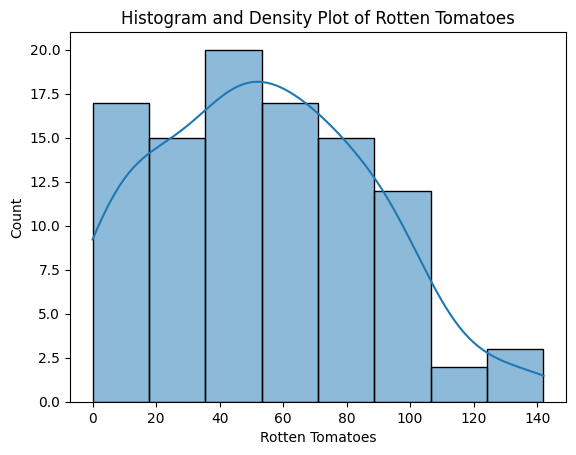

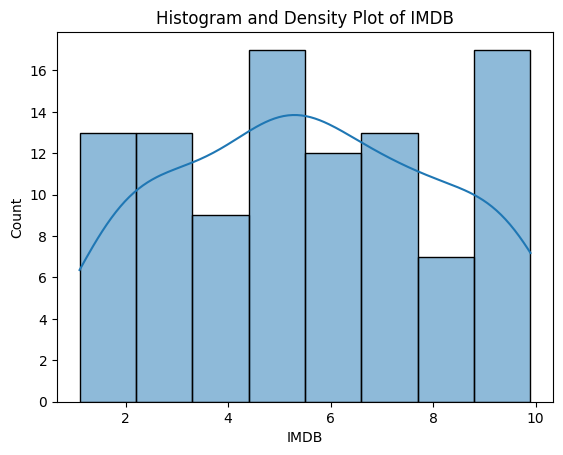

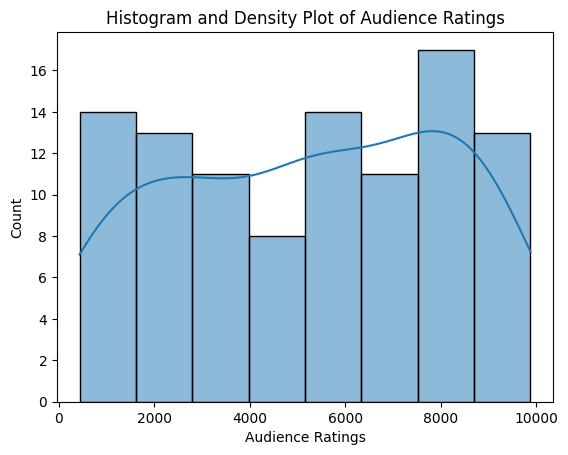

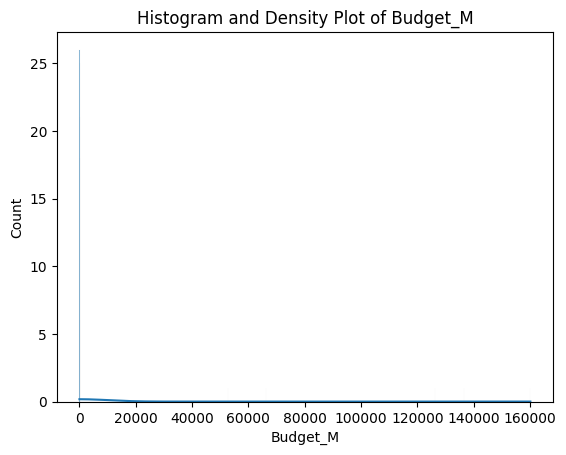

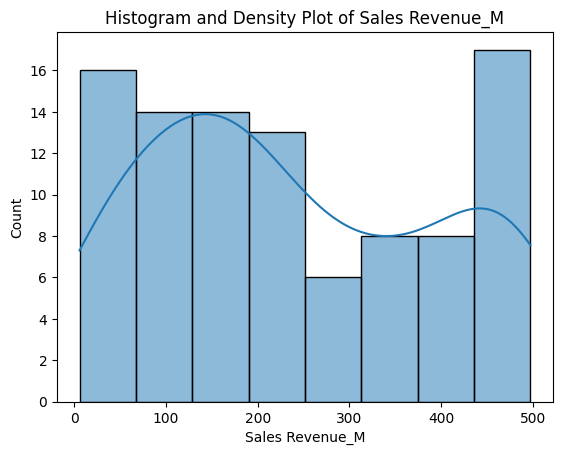

In [5]:
# Initial Visualization
for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col],kde = True)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.show()

# Imputation Technique Comparison

Some variables in Genre, Sales Revnuew_M, and Year of Release have missing or extra appendages to their cell entries, so we should impute some of these entries

In [6]:
print(df.dtypes)

Genre                object
Rotten Tomatoes       int64
IMDB                float64
Audience Ratings      int64
Budget_M            float64
Sales Revenue_M     float64
Year of Release      object
dtype: object


## Genre

In [7]:
df['Genre']=df["Genre"].replace('SciFi','Sci-Fi')
print(df['Genre'].unique())

['Horror' 'Romance' 'Sci-Fi' 'Action' 'Thriller' 'Comedy' 'Drama'
 'Documentary']


By using this, we combined SciFi and Sci-Fi categories together and it should now accurately show the data of the movies under this category.

## Sales Revenue

In [8]:
# Sales Revenue
sales_mean= df['Sales Revenue_M'].mean()
df_sales= df["Sales Revenue_M"].fillna(sales_mean, inplace=True)

print(df['Sales Revenue_M'].unique(),"\n")

[ 31.35647601 212.0161259  129.3420334  424.5191542   16.65231327
 479.4913609  177.6844242  178.3534452    8.16425134  92.61616262
 200.6297504  464.6457087   49.80746511 472.6507667  434.7442653
 227.0811985  163.3504409  116.3720646  307.2323532   16.53729574
   7.80303222 214.3978612   34.03703699 125.9704941  110.5804577
 126.5955969   65.52761561   6.01811145  57.74214857 309.2401298
 487.1281064  239.42276819 204.5270477   81.47721302 319.3808787
 245.1526733  494.7048886   32.65210358 391.6172192  144.1992487
 120.70931    331.2522858  123.0315925  332.9295588  258.6542586
 277.3439043  143.52576    353.2873531  207.4284347  180.2727802
 414.3284573  462.483456    23.00365544 116.3134964  174.2596847
 407.4832397  492.7457138  484.4858523  452.4741728  148.2781325
 496.0056217  124.7100205   52.95307744 116.7101277  344.8841325
  29.17817949 365.3545496  440.8601062  136.2184477  189.528448
 187.1480917   85.92654952 224.6458243  152.2342037  419.5945611
 118.870913   251.19472

Since there was a null value, we replaced it with the mean of the Sales Revenue_M category so that no cell entry is empty or null. This should theoretically make the mean change slightly but still have the same median

The variance for Sales Revenue increased after taking care of the 5 null values from 156.248835 to 157.072535

## Year of Release

In [9]:
# Year of Release
df['Year of Release']=df['Year of Release'].str.replace('Year','')
df['Year of Release'].unique()

array(['2020', '2013', '2017', '2019', '2012', '2006', '2015', '2005',
       ' 2004', '1998', '2000', '2010', '2008', '1988', '2004', '2022',
       ' 2008', '1983', '1999', '1980', '1990', '1986', '2007', '2014',
       '2018', ' 2023', '2016', '2021', '1982', '1992', '1995', '2003',
       '1985', '1981', '1991', '2001', ' 1982', '2009', '1989', '2023',
       ' 2001', '1993', '2011', '1996', '2002'], dtype=object)

Some years had extra strings such as 'Year 2003', so by replacing it, we can now categorize every movie in a certain category by date

# Encoding Categorical Variables

In [10]:
df_encoded = pd.get_dummies(df, columns=['Genre'])
df = df_encoded
df

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release,Genre_Action,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Romance,Genre_Sci-Fi,Genre_Thriller
0,125,5.0,3968,74.348337,31.356476,2020,0,0,0,0,1,0,0,0
1,84,9.8,8150,28.243154,212.016126,2013,0,0,0,0,0,1,0,0
2,75,2.0,1040,164.601429,129.342033,2017,0,0,0,0,0,0,1,0
3,68,7.9,6250,38.779734,424.519154,2019,1,0,0,0,0,0,0,0
4,6,4.7,8356,102.752477,16.652313,2012,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,52,5.3,4950,163.289240,191.404030,2019,0,0,0,0,0,0,1,0
97,67,7.1,2665,32.723478,447.692942,2002,0,0,0,0,0,0,0,1
98,61,6.5,3057,126150.789400,483.897336,1999,0,0,0,0,0,0,1,0
99,14,7.4,6838,80.288417,273.442451,1985,0,0,0,0,1,0,0,0


# Data Transformation Methods

Data Transformation Methods that were used in this notebook were:
> Mean Imputation of Null Values in [Sales Revenue_M]: Filled in null values with the mean of the category

> One-Hot Encoding of [Genre] category: Converting categorical variable into a binary variable that contains only 1's and 0's for if they are in it or not

# Outlier Identification and Handling

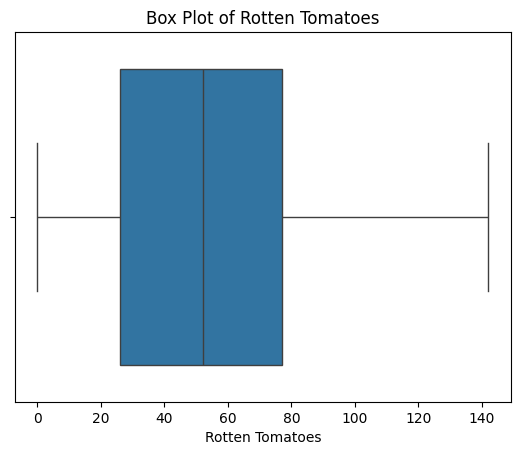

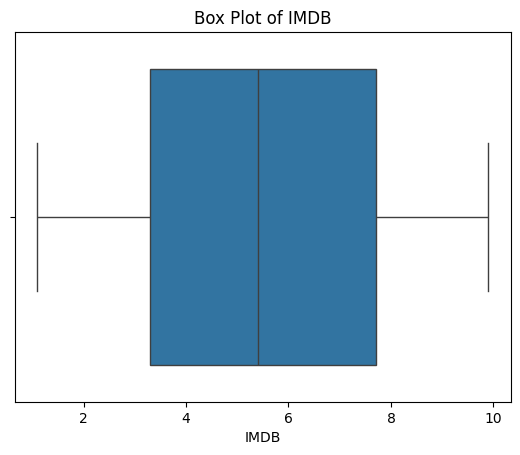

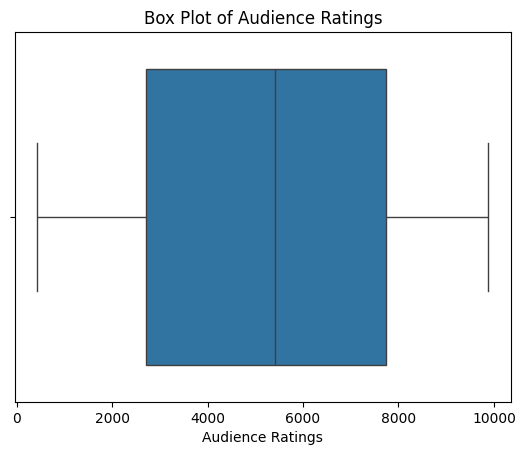

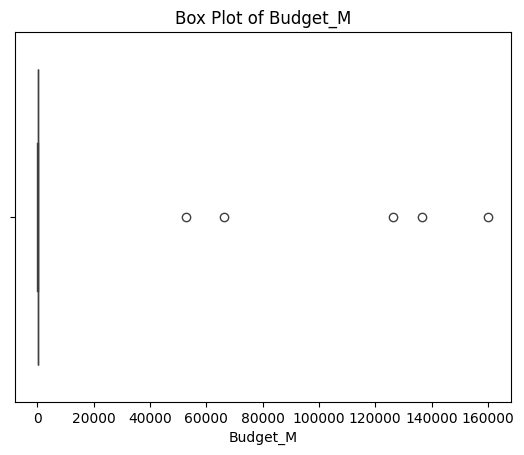

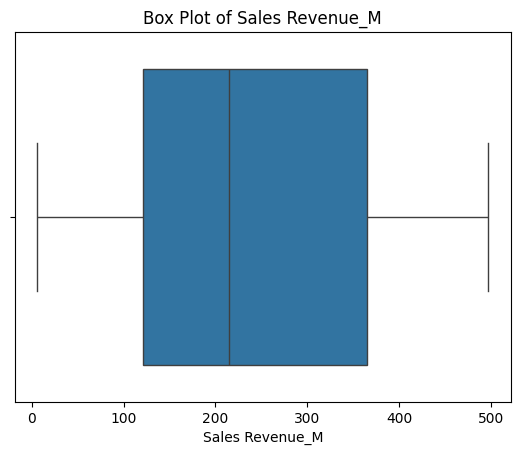

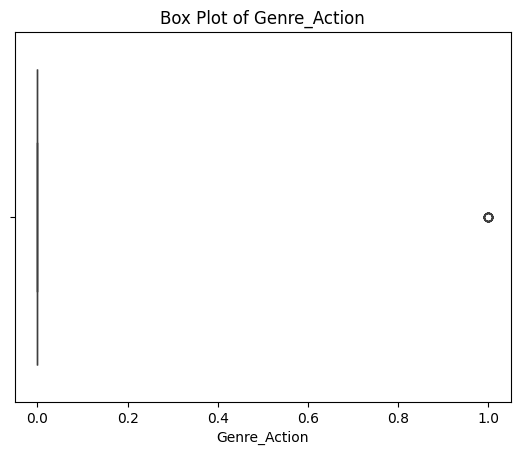

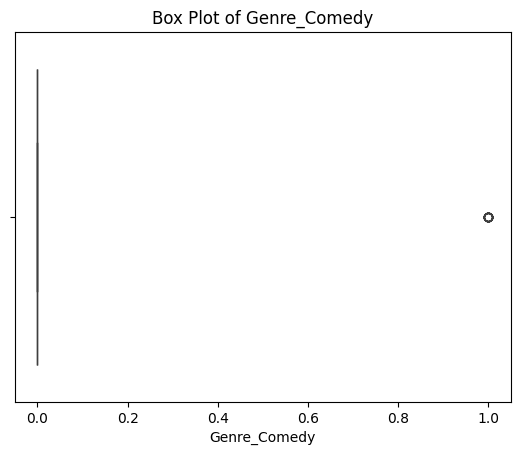

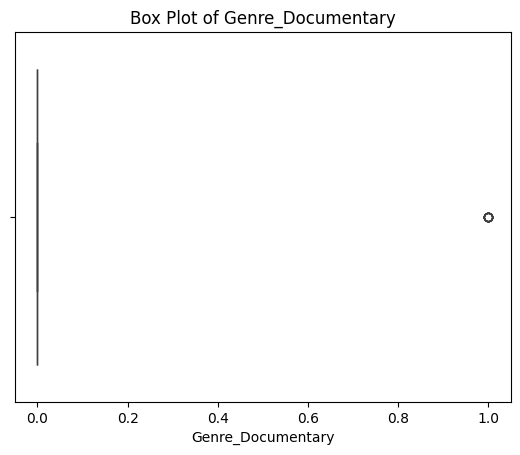

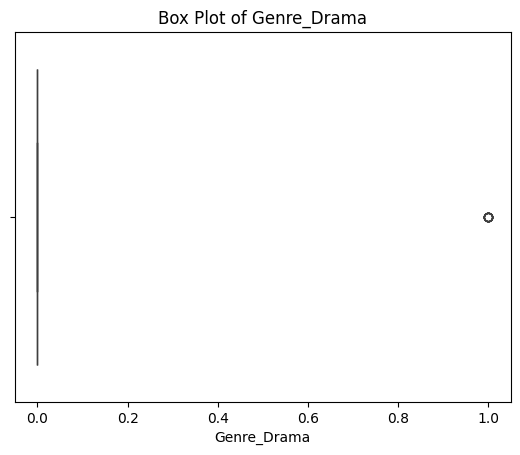

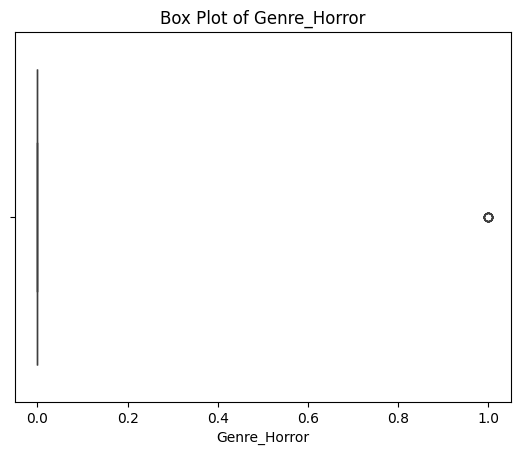

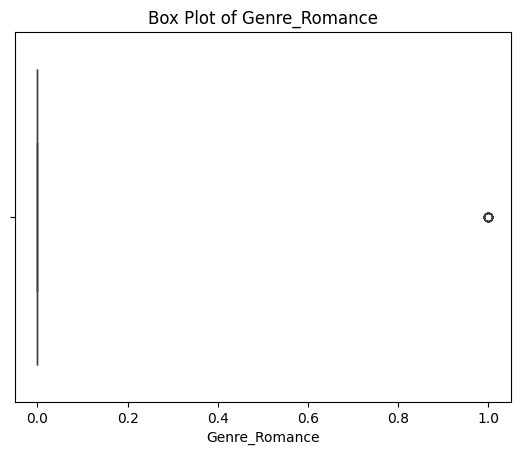

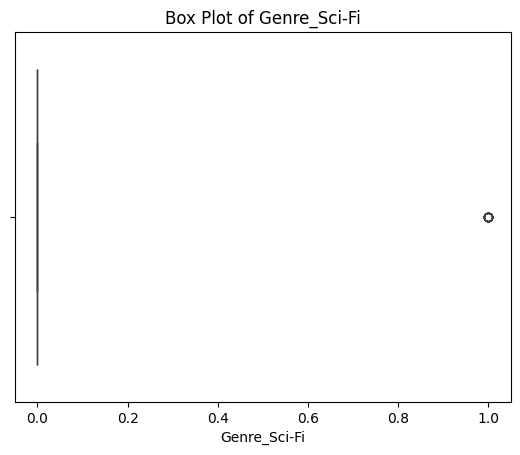

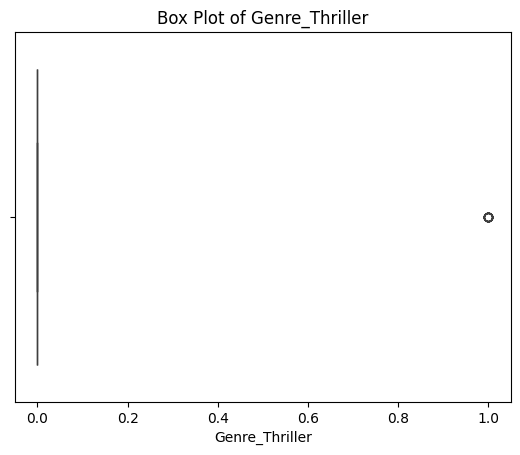

In [11]:
# Creating Boxplots
for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

# Handling Missing Values

In [12]:
# Checking for invalid entries for the numerical columns
invalid_entries=df[df.select_dtypes(include=['number'])<0].count()
print("Invalid Entries:\n",invalid_entries)

Invalid Entries:
 Rotten Tomatoes      0
IMDB                 0
Audience Ratings     0
Budget_M             0
Sales Revenue_M      0
Year of Release      0
Genre_Action         0
Genre_Comedy         0
Genre_Documentary    0
Genre_Drama          0
Genre_Horror         0
Genre_Romance        0
Genre_Sci-Fi         0
Genre_Thriller       0
dtype: int64


In [13]:
m_df=df.isnull().sum()
print('Missing data:\n',m_df)

Missing data:
 Rotten Tomatoes      0
IMDB                 0
Audience Ratings     0
Budget_M             0
Sales Revenue_M      0
Year of Release      0
Genre_Action         0
Genre_Comedy         0
Genre_Documentary    0
Genre_Drama          0
Genre_Horror         0
Genre_Romance        0
Genre_Sci-Fi         0
Genre_Thriller       0
dtype: int64


In [14]:
df.dropna(subset=['Sales Revenue_M'],inplace = True)
df.isnull().sum()

Rotten Tomatoes      0
IMDB                 0
Audience Ratings     0
Budget_M             0
Sales Revenue_M      0
Year of Release      0
Genre_Action         0
Genre_Comedy         0
Genre_Documentary    0
Genre_Drama          0
Genre_Horror         0
Genre_Romance        0
Genre_Sci-Fi         0
Genre_Thriller       0
dtype: int64

# Feature Engineering

Let's create a Profit Margin category!

In [15]:
df['Profit Margin'] = ((df['Sales Revenue_M']- df['Budget_M'])/df['Sales Revenue_M'])*100

In [16]:
df

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release,Genre_Action,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_Horror,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Profit Margin
0,125,5.0,3968,74.348337,31.356476,2020,0,0,0,0,1,0,0,0,-137.106799
1,84,9.8,8150,28.243154,212.016126,2013,0,0,0,0,0,1,0,0,86.678771
2,75,2.0,1040,164.601429,129.342033,2017,0,0,0,0,0,0,1,0,-27.260585
3,68,7.9,6250,38.779734,424.519154,2019,1,0,0,0,0,0,0,0,90.865021
4,6,4.7,8356,102.752477,16.652313,2012,0,0,0,0,0,0,0,1,-517.046268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,52,5.3,4950,163.289240,191.404030,2019,0,0,0,0,0,0,1,0,14.688714
97,67,7.1,2665,32.723478,447.692942,2002,0,0,0,0,0,0,0,1,92.690642
98,61,6.5,3057,126150.789400,483.897336,1999,0,0,0,0,0,0,1,0,-25969.742493
99,14,7.4,6838,80.288417,273.442451,1985,0,0,0,0,1,0,0,0,70.637910
